In [14]:
import geopandas as gpd
import pandas as pd
#import numpy as np
#import rasterio
#from rasterio.mask import mask
#from rasterio.features import shapes
#from shapely.geometry import box
#from shapely.geometry import shape
import matplotlib.pyplot as plt
#from tqdm import tqdm
#from osgeo import gdal
import yaml
import os

# Load configuration
with open('../../config.yaml', 'r') as file:
    config = yaml.safe_load(file)

def resolve_path(relative_path):
    return os.path.join(config['base_path'], relative_path)

EPSG:4326
EPSG:4326


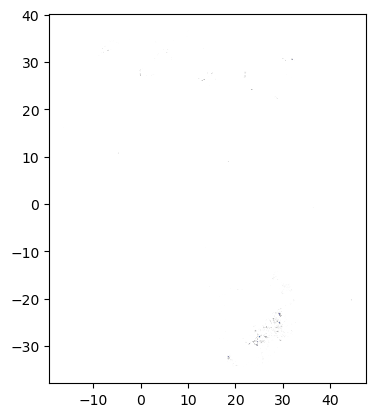

In [15]:
CPIS_2000_path = resolve_path(config['Africa_CPIS_2021_shp_path'])
Africa_All_Arid_path = resolve_path(config['Africa_all_shp_path'])

CPIS_gdf = gpd.read_file(CPIS_2000_path)
Africa_Arid_gdf = gpd.read_file(Africa_All_Arid_path)

CPIS_gdf.set_crs(epsg=4326, inplace = True)
Africa_Arid_gdf.set_crs(epsg=4326, inplace = True)
print(CPIS_gdf.crs)
print(Africa_Arid_gdf.crs)

combined_gdf = gpd.overlay(Africa_Arid_gdf, CPIS_gdf, how = 'intersection')
combined_gdf['source'] = 'CPIS'

combined_gdf.plot()
plt.show()

In [24]:
print(combined_gdf.head())
if 'aridity_class' in combined_gdf.columns:
    unique_aridity_values = combined_gdf['aridity_class'].unique()
    print("\nUnique values in aridity_class column:")
    print(unique_aridity_values)
else:
    print("\n'aridity_class' column not found in the combined GeoDataFrame.")

Africa_Boundaries = gpd.read_file(resolve_path(config['Africa_boundaries_shp_path']))
Africa_Boundaries['source'] = 'Boundaries'

#overlay_gdf = gpd.GeoDataFrame(pd.concat([Africa_Boundaries, combined_gdf], ignore_index = True))

   FID                                           geometry aridity_class
0    0  POLYGON ((14.79167 38.00000, 14.80833 38.00000...     semi_arid
1    1  POLYGON ((14.82500 38.00000, 14.84167 38.00000...     semi_arid
2    2  POLYGON ((21.36667 38.00000, 21.37500 38.00000...     semi_arid
3    3  POLYGON ((47.60833 38.00000, 47.61667 38.00000...     semi_arid
4    4  POLYGON ((12.32500 38.00000, 12.35000 38.00000...     semi_arid

Unique values in aridity_class column:
['semi_arid' 'arid' 'hyper_arid' 'all']


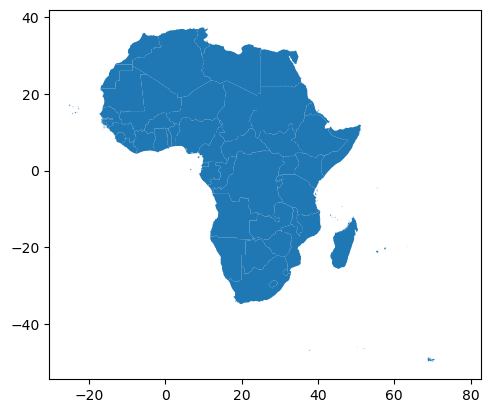

In [17]:
overlay_gdf.plot()
plt.show()

In [19]:
print(overlay_gdf.head())

  Country Co                      Country  \
0        AGO                       Angola   
1        ATF  French Southern Territories   
2        BDI                      Burundi   
3        BEN                        Benin   
4        BFA                 Burkina Faso   

                                            geometry      source  FID  Id  
0  MULTIPOLYGON (((11.70236 -16.50764, 11.70236 -...  Boundaries  NaN NaN  
1  MULTIPOLYGON (((68.86333 -50.01889, 68.86166 -...  Boundaries  NaN NaN  
2  POLYGON ((30.41152 -2.31061, 30.41243 -2.31180...  Boundaries  NaN NaN  
3  MULTIPOLYGON (((1.87042 6.28819, 1.87042 6.287...  Boundaries  NaN NaN  
4  POLYGON ((-0.45567 15.08082, -0.44206 15.06812...  Boundaries  NaN NaN  


## Code to merge the aridity layers and keep data:

In [25]:
import geopandas as gpd
import os
import yaml

# Load configuration
with open('../../config.yaml', 'r') as file:
    config = yaml.safe_load(file)

def resolve_path(relative_path):
    return os.path.join(config['base_path'], relative_path)

# Define the aridity classes and corresponding shapefile paths
arid_classes = {
    'semi_arid': resolve_path(config['Africa_semi_arid_shp_path']),
    'arid': resolve_path(config['Africa_arid_shp_path']),
    'hyper_arid': resolve_path(config['Africa_hyper_arid_shp_path']),
    'all': resolve_path(config['Africa_all_shp_path'])
}

# List to hold the GeoDataFrames
gdfs = []

# Read each shapefile, add the aridity class, and append to the list
for aridity, path in arid_classes.items():
    print(f"Loading {aridity} shapefile from {path}")
    gdf = gpd.read_file(path)
    gdf['aridity_class'] = aridity
    gdfs.append(gdf)

# Concatenate all GeoDataFrames
combined_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

# Save the combined GeoDataFrame as a new shapefile
combined_shp_path = resolve_path(config['Africa_arid_layered_shp_path'])
combined_gdf.to_file(combined_shp_path)

print(f"Combined shapefile saved successfully to {combined_shp_path}")


Loading semi_arid shapefile from /home/ermiller/Africa_Irrigation/Data/Processed/Africa_Semi_Arid-shp
Loading arid shapefile from /home/ermiller/Africa_Irrigation/Data/Processed/Africa_Arid-shp
Loading hyper_arid shapefile from /home/ermiller/Africa_Irrigation/Data/Processed/Africa_Hyper_Arid-shp
Loading all shapefile from /home/ermiller/Africa_Irrigation/Data/Processed/Africa_Arid_Regions_All-shp


/tmp/ipykernel_204466/1167657776.py:35: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  combined_gdf.to_file(combined_shp_path)


Combined shapefile saved successfully to /home/ermiller/Africa_Irrigation/Data/Processed/Africa_Layered_Aridity-shp


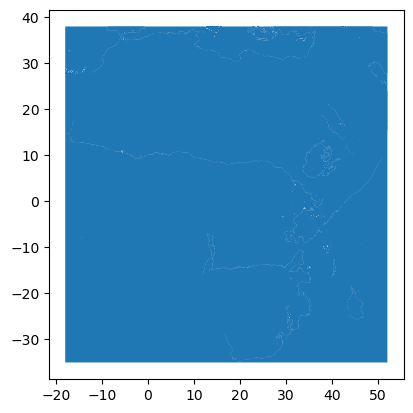

In [26]:

combined_gdf.plot()
plt.show()
